In [12]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
    
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/allison2368/STA141C_FinalProject/main/Training.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe

print (df.head())

# how many symptoms? 
# remove the empty column 
nan_value = float("NaN") 
df.replace("", nan_value, inplace=True) 
  
df.dropna(how='all', axis=1, inplace=True)

# count the number of symptoms 
symptoms = df.drop(columns=['prognosis'])

# Count the number of symptoms
num_symptoms = len(symptoms.columns)

print("Number of symptoms:", num_symptoms)
print (df.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

We will now conduct exploratory data analysis to see what the data looks like 

In [4]:
# Extract symptoms columns
symptoms = df.drop(columns=['prognosis'])

# Calculate the statistical summary for each symptom
symptoms_summary = symptoms.describe()

# Print the statistical summary for each symptom
print(symptoms_summary)

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593 

In [5]:
# since the data is binary coded, we will look at a summary that is more appropriate for binary data
# Extract symptoms columns
symptoms = df.drop(columns=['prognosis'])

# Calculate count of 1s and 0s for each symptom
symptom_counts = symptoms.sum()  # Sum across rows to count occurrences of 1s (presence)

# Calculate proportion of 1s for each symptom
symptom_proportions = symptom_counts / len(symptoms)

# Create a DataFrame to display the summary
summary_df = pd.DataFrame({
    'Count_of_1s': symptom_counts,
    'Count_of_0s': len(symptoms) - symptom_counts,
    'Proportion_of_1s': symptom_proportions
})

# Print the summary
print(summary_df)

                      Count_of_1s  Count_of_0s  Proportion_of_1s
itching                     678.0       4242.0          0.137805
skin_rash                   786.0       4134.0          0.159756
nodal_skin_eruptions        108.0       4812.0          0.021951
continuous_sneezing         222.0       4698.0          0.045122
shivering                   108.0       4812.0          0.021951
...                           ...          ...               ...
inflammatory_nails          114.0       4806.0          0.023171
blister                     114.0       4806.0          0.023171
red_sore_around_nose        114.0       4806.0          0.023171
yellow_crust_ooze           114.0       4806.0          0.023171
Unnamed: 133                  0.0       4920.0          0.000000

[133 rows x 3 columns]


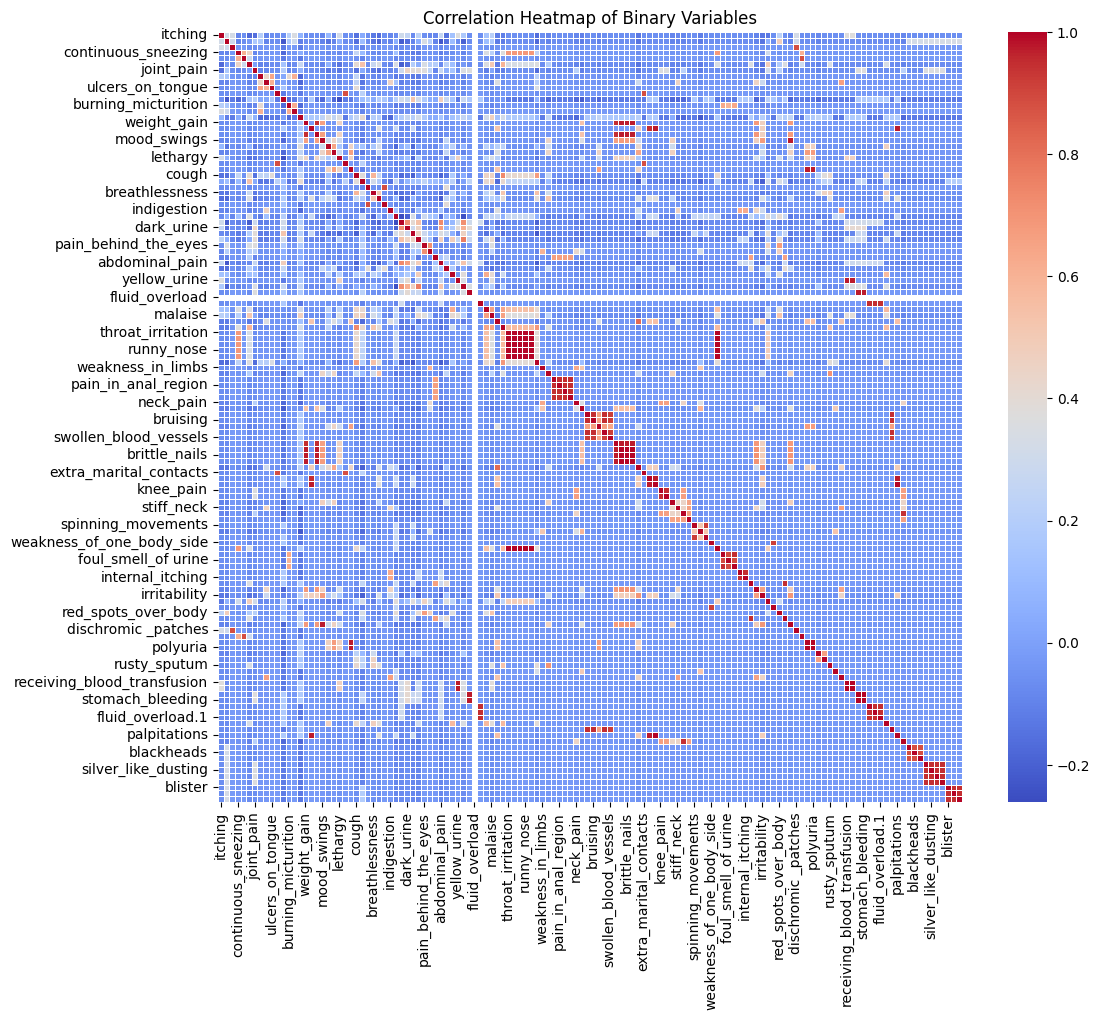

In [13]:
# view the data in a correlation map
# Calculate the correlation matrix
corr_matrix = symptoms.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Binary Variables')
plt.show()